In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station
# print(Station)


In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1deb27640b0>,
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0}

In [10]:
for row in session.query(Measurement.date).limit(15).all():
    print(row)
    

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)


In [11]:
# Find the most recent date in the data set.
recent = session.query(Measurement).\
    order_by(Measurement.date.desc()).first()
print(recent.date)

2017-08-23


In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
precipitation = session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date < '2017-08-23').\
    order_by(Measurement.date.desc()).all()
precipitation


[(0.0, '2017-08-22'),
 (0.0, '2017-08-22'),
 (0.5, '2017-08-22'),
 (0.0, '2017-08-21'),
 (0.02, '2017-08-21'),
 (None, '2017-08-21'),
 (0.56, '2017-08-21'),
 (0.0, '2017-08-20'),
 (0.01, '2017-08-20'),
 (None, '2017-08-20'),
 (0.0, '2017-08-19'),
 (0.0, '2017-08-19'),
 (None, '2017-08-19'),
 (0.09, '2017-08-19'),
 (0.0, '2017-08-18'),
 (0.0, '2017-08-18'),
 (0.06, '2017-08-18'),
 (None, '2017-08-18'),
 (0.0, '2017-08-17'),
 (0.05, '2017-08-17'),
 (0.01, '2017-08-17'),
 (0.13, '2017-08-17'),
 (0.0, '2017-08-16'),
 (0.07, '2017-08-16'),
 (0.12, '2017-08-16'),
 (0.42, '2017-08-16'),
 (0.02, '2017-08-15'),
 (0.0, '2017-08-15'),
 (0.06, '2017-08-15'),
 (0.32, '2017-08-15'),
 (0.42, '2017-08-15'),
 (0.0, '2017-08-14'),
 (0.01, '2017-08-14'),
 (0.08, '2017-08-14'),
 (0.0, '2017-08-14'),
 (0.22, '2017-08-14'),
 (0.0, '2017-08-13'),
 (None, '2017-08-13'),
 (0.0, '2017-08-13'),
 (0.0, '2017-08-13'),
 (None, '2017-08-13'),
 (0.0, '2017-08-12'),
 (0.0, '2017-08-12'),
 (0.14, '2017-08-12'),
 (0.0, 

In [34]:
# Starting from the most recent data point in the database.
most_recent = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
year_from = most_recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

outcome = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_from).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation).set_index('date')

# Sort the dataframe by date
df = df.sort_values(by='date')
df.head()




,prcp
date,
2010-01-01,0.14
2010-01-01,0.08
2010-01-01,0.28
2010-01-01,0.05
2010-01-01,0.15


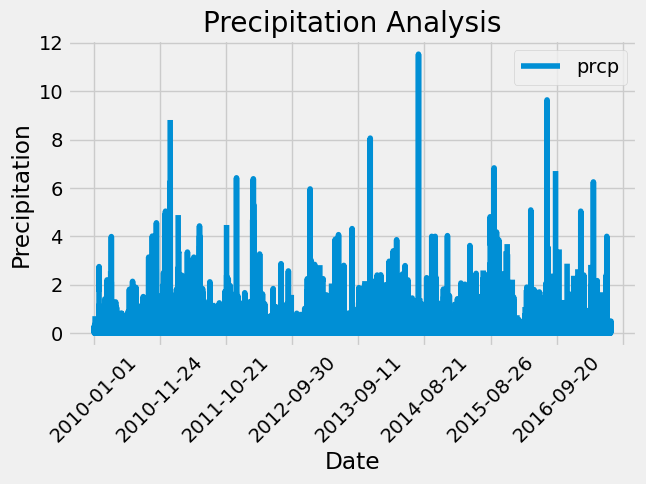

<Figure size 640x480 with 0 Axes>

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(rot=45)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title("Precipitation Analysis")
plt.show()
plt.savefig("./Figures/Date_Prcp.png")

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,18099.000000
mean,0.160650
std,0.468789
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [38]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1debfb58290>,
 'id': 1,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'elevation': 3.0}

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"{low,high,avg}")

([(54.0,)], [(85.0,)], [(71.66378066378067,)])


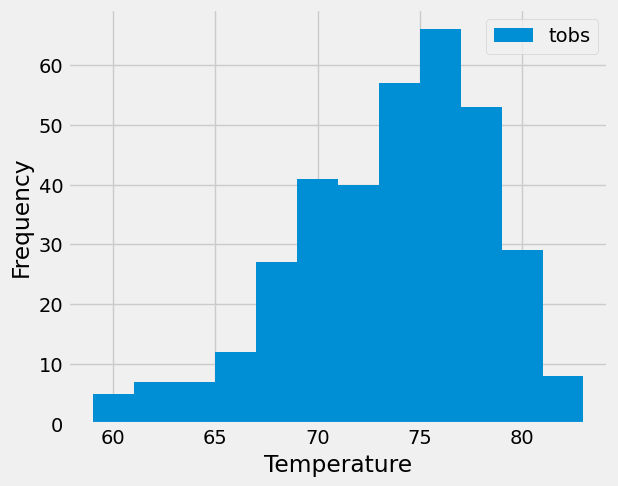

In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= year_from).all()

df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.show()

# Close Session

In [82]:
# Close Session
session.close()
